# **MODULO 3**

**Curso:** Ciencia y analitica de Datos  
**Matricula:** A01793718  
**Nombre:** Cristian Reynaldo Miranda Jimenez  


## **Exploratory Data Analysis (EDA)**
This process is used for:
- Summarize main characteristics of the data
- Gain better understanding of the data set
- Uncover relationships between variables

## **Descriptive Statistics**
This describe basic features of data and give short summaries about the sample and measures of the data

In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Data
names_auto = ["symboling",
 "normalized_losses",
 "make",
 "fuel_type",
 "aspiration",
 "doors",
 "body_style",
 "drive_wheels",
 "engine_location",
 "wheel_base",
 "length",
 "width",
 "height",
 "curb_weigth",
 "engine_type",
 "cylinders",
 "engine_size",
 "fuel_system",
 "bore",
 "stroke",
 "compression_ratio",
 "horsepower",
 "peak_rpm",
 "city_mpg",
 "highwway_mpg",
 "price"
 ]

autos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names=names_auto)
autos["price"] = autos["price"].replace("?",np.nan).astype(float)
autos["horsepower"] = autos["horsepower"].replace("?",np.nan).astype(float)
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highwway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [3]:
# Describe - summarize statistics
autos.describe()

,symboling,wheel_base,length,width,height,curb_weigth,engine_size,compression_ratio,city_mpg,highwway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
# values_counts - summarize the categorical data
drive_wheels_counts = autos["drive_wheels"].value_counts()
drive_wheels_counts.rename({'drive_wheels':"value_counts"},inplace=True)
drive_wheels_counts.index.name = "drive_wheels"
drive_wheels_counts

drive_wheels
fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

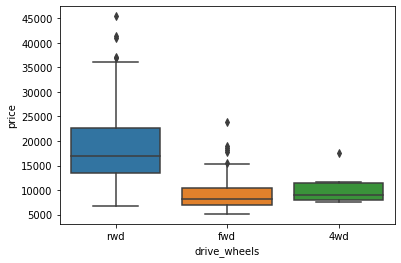

In [19]:
# Box plot - to detect outliers and point distribution by category
sns.boxplot(x="drive_wheels",y="price",data=autos)
plt.show

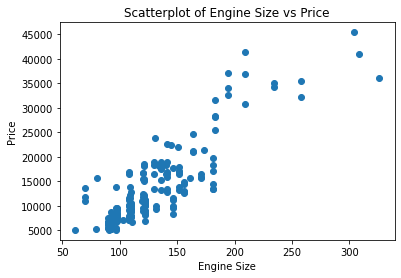

In [24]:
# Scatter plot - to show relationship between two variables (x:independet, y:dependent)
plt.scatter(x=autos["engine_size"],y=autos["price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Scatterplot of Engine Size vs Price")
plt.show()

# Linear relationship

## **GroupBy in Python**
- Can be applied on categorical variables
- Group into categories
- Single or multiple variables


In [27]:
# Group by method
df_test = autos[["drive_wheels","body_style","price"]]
df_grp = df_test.groupby(["drive_wheels","body_style"], as_index=False).mean()
df_grp

,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [29]:
# Pivot format - one variable displayed along columns and the other along rows
df_pivot = df_grp.pivot(index="drive_wheels",columns="body_style")
df_pivot 

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

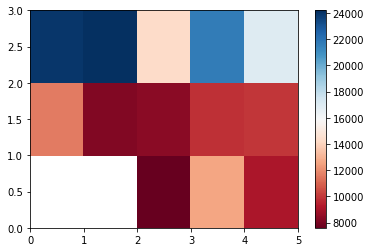

In [30]:
# Heatmap - plot target variable over multiple others
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

## Analysis of Variance ANOVA
ANOVA is a statistical test that stand for "Analysis of Variance", also is used for finding correlation between different groups of a categorical variable.  
The anova returns 2 values:
- **F-test:** variation between sample group means divided by variation within sample group
- **P-Value:** confidence degree



In [47]:
df_bar = autos.groupby("make")["price"].mean().reset_index()
df_bar.head()

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444


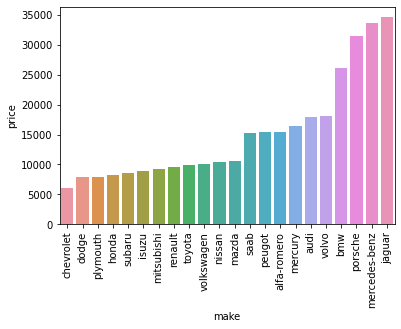

In [55]:
sns.barplot(x="make",y="price",data=df_bar.sort_values(["price"]))
plt.xticks(rotation=90)
plt.show()

In [69]:
# Anova between 'Honda' and 'Subaru'
df_anova = autos[["make","price"]]
grouped_anova = df_anova.groupby(["make"])

anova_results_1 = scipy.stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"] )
anova_results_1

# The prices between Hondas and Subarus are not significantly different, as the F-test
# score is less than 1 and p-value is larger than 0.05.

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [72]:
# Anova between 'Honda' and 'Jaguar'
anova_results_2 = scipy.stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("jaguar")["price"] )
anova_results_2

# The prices between Hondas and Jaguars are significantly different, since the F-score
# is very large (F = 401) and the p-value is larger than 0.05.

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

We can say that there is a strong correlation between a categorical variable
and other variables, if the ANOVA test gives us a large F-test value and a small p-value.


## **Correlation**
This is a statistical metric for measuring to what extend different variables are interdependent. Correlation doesn't imply causation.



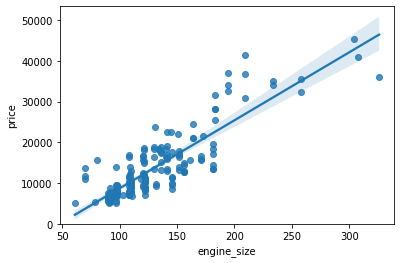

In [6]:
# Positive linear relationship between variables
sns.regplot(x="engine_size",y="price",data=autos)
plt.ylim(0,)
plt.show()

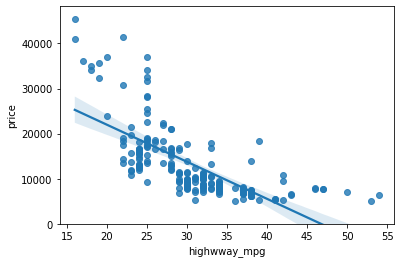

In [9]:
# Negative linear relationship between variables
sns.regplot(x="highwway_mpg",y="price",data=autos)
plt.ylim(0,)
plt.show()

UFuncTypeError: ignored

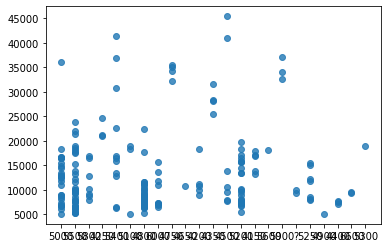

In [11]:
# Weak correlation between variables
sns.regplot(x="peak_rpm ",y="price",data=autos)
plt.ylim(0,)
plt.show()

## **Correlation - Statistics**
The Pearson correlation method, will give you two values, the Correlation coefficient and the p-value.  

Negative relationship < 0 < Positive relationship

Pvalue:
- P-value < 0.001: Strong certainty in the result
-  P-value < 0.05: Moderate certainty in the result
- P-value < 0.1: Weak certainty in the result
- P-value > 0.1: No certainty in the result

In [48]:
df_pearson = autos[["horsepower","price"]].dropna()
person_coef, p_value = scipy.stats.pearsonr(df_pearson["horsepower"],df_pearson["price"])
print("Pearson corr:",person_coef.round(2),"\n P-Value:" ,p_value.round(2))





Pearson corr: 0.81 
 P-Value: 0.0


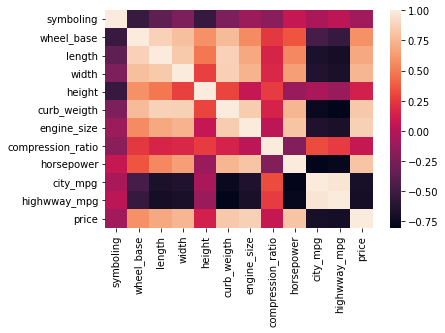

In [50]:
sns.heatmap(autos.corr())
plt.show()